In [87]:
import pandas
import datetime
import numpy
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
%matplotlib inline
from matplotlib import rcParams

In [2]:
#### In this block we load Velocity data ####
#### In this block we load Velocity data ####
#### In this block we load Velocity data ####
# file with velocities
rawVelFileName = "../data/test-vels-north.txt"
# need to format the file appropritely, before we can read it
outFormattedFile = "../data/formatted-vels.txt"
# os.system( 'cat ' + rawVelFileName + ' | tr -s "  " > ' + outFormattedFile )
inpColNames = [ "dateStr", "timeStr", "beam", "range", \
          "azim", "Vlos", "MLAT", "MLON", "MLT", "radId", \
          "radCode"]
velsDataDF = pandas.read_csv(outFormattedFile, sep=' ',\
                             header=None, names=inpColNames)
# add a datetime col
velsDataDF["date"] = pandas.to_datetime( \
                        velsDataDF['dateStr'].astype(str) + "-" +\
                        velsDataDF['timeStr'].astype(str), format='%Y%m%d-%H%M')
# for some reason MLAT is a str type, convert it to float
velsDataDF["MLAT"] = velsDataDF["MLAT"].astype(float)
# Also get a normMLT for plotting
velsDataDF['normMLT'] = [x-24 if x >= 12 else x for x in velsDataDF['MLT']]
velsDataDF.head()
#### In this block we load SAPS Velocity data ####
#### In this block we load SAPS Velocity data ####
#### In this block we load SAPS Velocity data ####

,dateStr,timeStr,beam,range,azim,Vlos,MLAT,MLON,MLT,radId,radCode,date,normMLT
0,20110409,600,0,26,-60.95,-2.2716,53.2044,-21.8611,23.6993,33,bks,2011-04-09 06:00:00,-0.3007
1,20110409,600,0,27,-60.95,-5.1056,53.3065,-22.5771,23.6515,33,bks,2011-04-09 06:00:00,-0.3485
2,20110409,600,0,28,-60.95,-5.1056,53.4035,-23.2954,23.6036,33,bks,2011-04-09 06:00:00,-0.3964
3,20110409,600,0,29,-60.95,-4.5666,53.4954,-24.0159,23.5556,33,bks,2011-04-09 06:00:00,-0.4444
4,20110409,600,0,30,-60.95,-3.6944,53.5823,-24.7384,23.5074,33,bks,2011-04-09 06:00:00,-0.4926


In [3]:
#### In this block we filter for SAPS velocities ####
#### In this block we filter for SAPS velocities ####
#### In this block we filter for SAPS velocities ####
# remove velocies whose magnitude is less than 200 m/s
velsDataDF = velsDataDF[ abs(velsDataDF["Vlos"]) >= 200. ]
# SAPS(westward) Vlos are positive for positive azimuths and vice versa.
# filter the others out
velsDataDF = velsDataDF[ velsDataDF["azim"]/velsDataDF["Vlos"] > 0. ].reset_index(drop=True)
velsDataDF.head()
#### In this block we filter for SAPS velocities ####
#### In this block we filter for SAPS velocities ####
#### In this block we filter for SAPS velocities ####

,dateStr,timeStr,beam,range,azim,Vlos,MLAT,MLON,MLT,radId,radCode,date,normMLT
0,20110409,706,9,28,-26.21,-244.3651,59.1492,-14.0168,1.3205,33,bks,2011-04-09 07:06:00,1.3205
1,20110409,706,10,28,-22.35,-244.3651,59.5371,-12.4132,1.4274,33,bks,2011-04-09 07:06:00,1.4274
2,20110409,708,9,27,-26.21,-226.6634,58.8263,-13.5483,1.3848,33,bks,2011-04-09 07:08:00,1.3848
3,20110409,708,10,27,-22.35,-226.6634,59.1965,-12.0037,1.4878,33,bks,2011-04-09 07:08:00,1.4878
4,20110409,730,8,27,-30.07,-257.8685,58.3937,-14.9997,1.6560,33,bks,2011-04-09 07:30:00,1.6560


In [4]:
#### Need prev SAPS data to determine SAPS scatter ####
#### Need prev SAPS data to determine SAPS scatter ####
#### Need prev SAPS data to determine SAPS scatter ####
datFileName = "../data/processedSaps.txt"
sapsDataDF = pandas.read_csv(datFileName, sep=' ', dtype={'dateStr':'str', 'time': 'str'})

sapsDataDF["date"] = pandas.to_datetime( \
                        sapsDataDF['dateStr'] + "-" +\
                        sapsDataDF['time'], format='%Y%m%d-%H%M')
sapsDataDF.head()
#### Need prev SAPS data to determine SAPS scatter ####
#### Need prev SAPS data to determine SAPS scatter ####
#### Need prev SAPS data to determine SAPS scatter ####

,dateStr,sapsLat,sapsMLT,sapsVel,radId,poesLat,poesMLT,dst_date,dst_index,time,date
0,20110107,56.5,17.7543,308.2077,33.0,62.0082,18.0,2011-01-07 00:00:00,-18.0,0000,2011-01-07
1,20110107,55.5,18.0147,224.1588,33.0,62.0082,18.0,2011-01-07 00:00:00,-18.0,0000,2011-01-07
2,20110107,56.5,17.8749,307.4328,33.0,62.0082,18.0,2011-01-07 00:00:00,-18.0,0000,2011-01-07
3,20110107,55.5,18.1324,222.4787,33.0,62.0082,18.0,2011-01-07 00:00:00,-18.0,0000,2011-01-07
4,20110107,56.5,17.9955,305.4201,33.0,62.0082,18.0,2011-01-07 00:00:00,-18.0,0000,2011-01-07


In [5]:
#### Choose a time to and get POES boundaries as well ####
#### Choose a time to and get POES boundaries as well ####
#### Choose a time to and get POES boundaries as well ####
# we choose 0840 UT since that time was analyzed in the paper
timeSlctd = datetime.datetime( 2011, 4, 9, 8, 40 )
velAnlysDF = velsDataDF[ velsDataDF["date"] == timeSlctd ].reset_index(drop=True)
sapsSelPrdDF = sapsDataDF[  ( sapsDataDF["date"] - timeSlctd < numpy.timedelta64(30,'m') )\
           & ( sapsDataDF["date"] - timeSlctd > numpy.timedelta64(0,'m') )  ].reset_index(drop=True)
# Now check if there is more than one time period in the selected interval
# ideally there shouldn't be, but if we find one we should do something
# about it (like take an average)...for now its undecided.!
if len( sapsSelPrdDF["time"].unique() ) > 1:
    print "There is more than one time period selected!!!"
    print "NEED TO CHECK SOMETHING WRONG!!!"
    print "NEED TO CHECK SOMETHING WRONG!!!"
    print "NEED TO CHECK SOMETHING WRONG!!!"
poesBndDF = sapsSelPrdDF[ ["poesMLT", "poesLat"] \
                    ].drop_duplicates().reset_index(drop=True)
# Have a normalized MLT for ease of comparison
poesBndDF['normMLT'] = [x-24 if x >= 12 else x for x in poesBndDF['poesMLT']]
poesBndDF.head()
#### Choose a time to and get POES boundaries as well ####
#### Choose a time to and get POES boundaries as well ####
#### Choose a time to and get POES boundaries as well ####

,poesMLT,poesLat,normMLT
0,0.0,62.0360,0.0
1,1.0,61.5064,1.0
2,2.0,61.2108,2.0
3,3.0,61.1692,3.0
4,23.0,62.7634,-1.0


In [6]:
#### For the chosen time get velocities which fall below POES BND ####
#### For the chosen time get velocities which fall below POES BND ####
#### For the chosen time get velocities which fall below POES BND ####
# Merge POES boundary DF with the vels DF
velAnlysDF["normMLTRound"] = velAnlysDF["normMLT"].astype(int)
print "shape before join--->", velAnlysDF.shape
velAnlysDF = pandas.merge( velAnlysDF, poesBndDF, left_on="normMLTRound", right_on="normMLT", how="inner" )
print "shape after join--->", velAnlysDF.shape
# Filter out velocties above the POES boundary
velAnlysDF = velAnlysDF[ velAnlysDF["MLAT"] < velAnlysDF["poesLat"]\
                       ].reset_index(drop=True).drop_duplicates()
print "shape after filtering by boundary--->", velAnlysDF.shape
#### For the chosen time get velocities which fall below POES BND ####
#### For the chosen time get velocities which fall below POES BND ####
#### For the chosen time get velocities which fall below POES BND ####

shape before join---> (204, 14)
shape after join---> (195, 17)
shape after filtering by boundary---> (195, 17)


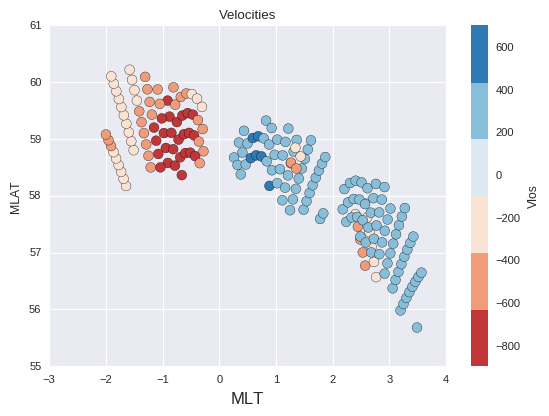

In [7]:
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("RdBu"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
velAnlysDF.plot( kind='scatter',
              x='normMLT_x',
              y='MLAT',
              c='Vlos',
              s=50., cmap=seaMap, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Velocities" )
# ax.set_ylim( [55., 62.] )

ax.get_figure().savefig("../figs/sapsVels.pdf",bbox_inches='tight')
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####

In [8]:
#### Divide the velocities into a MLT-MLAT grid ####
#### Divide the velocities into a MLT-MLAT grid ####
#### Divide the velocities into a MLT-MLAT grid ####
# Select only required columns/ discard unwanted cols
# velAnlysDF["grid_MLT"] = [ round(x*2)/2 for x in velAnlysDF['normMLT_x'] ]
velAnlysDF["grid_MLT"] = [ round(x) for x in velAnlysDF['normMLT_x'] ]
velAnlysDF["grid_MLAT"] = [ round(x*2)/2 for x in velAnlysDF['MLAT'] ]
velAnlysDF = velAnlysDF[ [ "beam", "range", "azim", "Vlos", "MLAT", \
                          "MLT", "grid_MLT", "grid_MLAT", "radId", \
                          "radCode", "normMLT_x" ] ]
velAnlysDF.head()
#### Divide the velocities into a MLT-MLAT grid ####
#### Divide the velocities into a MLT-MLAT grid ####
#### Divide the velocities into a MLT-MLAT grid ####

,beam,range,azim,Vlos,MLAT,MLT,grid_MLT,grid_MLAT,radId,radCode,normMLT_x
0,5,27,-41.65,-378.1679,56.7707,2.5742,3.0,57.0,33,bks,2.5742
1,5,28,-41.65,-396.3842,57.0027,2.5315,3.0,57.0,33,bks,2.5315
2,5,29,-41.65,-379.2044,57.2309,2.4884,2.0,57.0,33,bks,2.4884
3,5,30,-41.65,-368.0763,57.4553,2.4448,2.0,57.5,33,bks,2.4448
4,5,31,-41.65,-321.3911,57.6758,2.4007,2.0,57.5,33,bks,2.4007


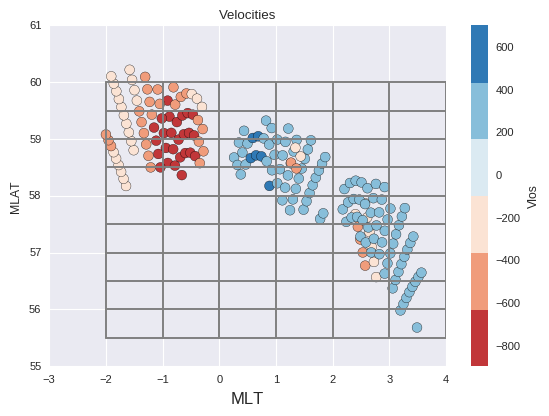

In [9]:
# print velAnlysDF[ velAnlysDF["radCode"] == "cve" ]#.plot( x="azim", y="Vlos", kind="scatter" )
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("RdBu"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
plotMLTs = velAnlysDF['grid_MLT'].unique().tolist()
plotMLATs = velAnlysDF['grid_MLAT'].unique().tolist()
for currMLT in plotMLTs :
    ax.plot( [currMLT, currMLT], [ min(plotMLATs), max(plotMLATs) ], '0.5' )
ax.plot( [0., 0.], [ min(plotMLATs), max(plotMLATs) ], '0.5' )
for currMLAT in plotMLATs :
    ax.plot( [ min(plotMLTs), max(plotMLTs) ], [currMLAT, currMLAT], '0.5' )
velAnlysDF.plot( kind='scatter',
              x='normMLT_x',
              y='MLAT',
              c='Vlos',
              s=50., cmap=seaMap, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Velocities" )
ax.set_ylim( [int(round(velAnlysDF['grid_MLAT'].min()))-1, \
              int(round(velAnlysDF['grid_MLAT'].max()))+1] )
ax.set_xlim( [int(round(velAnlysDF['grid_MLT'].min()))-1, \
              int(round(velAnlysDF['grid_MLT'].max()))] )

ax.get_figure().savefig("../figs/sapsVels-grid.pdf",bbox_inches='tight')
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####
#### Plot the chosen SAPS velocities ####

In [37]:
#### Fit the data using scipy.optimize for each cell ####
#### Fit the data using scipy.optimize for each cell ####
#### Fit the data using scipy.optimize for each cell ####
# Fit a sine curve for a given cell
def vel_sine_func(theta, Vmax, delTheta):
    # we are working in degrees but numpy deals with radians
    # convert to radians
    return Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )
# We'll store the fitting results in a DF
gridMLTArr = []
gridMLATArr = []
vMaxArr = []
azimArr = []
vErrArr = []
azimErrArr = []
for currMLAT in velAnlysDF["grid_MLAT"].unique():
    for currMLT in velAnlysDF["grid_MLT"].unique():
        currDataDF = velAnlysDF[ (velAnlysDF["grid_MLT"] == currMLT) &\
                 (velAnlysDF["grid_MLAT"] == currMLAT) ].reset_index(drop=True)
        # Only consider data within +/- 60 azim
        currDataDF = currDataDF[ abs(currDataDF["azim"]) <= 60. ]
        # Take out all the cells with no data
        if currDataDF.shape[0] != 0:
#             print "Fitting cell-->", currMLAT, currMLT
            # we'll set some rules and discard all cells which don't satisfy those
            # 1) discard where we have less than 3 unique values
            if currDataDF['azim'].shape[0] < 3:
#                 print "discarding! data points not sufficient!!!"
                continue
            # 2) There should be considerable spread in the data
            #    i.e., the difference between min and max should
            #    be large enough (>45 degrees).
            if (currDataDF['azim'].max() - currDataDF['azim'].min()) < 45.:
#                 print "discarding! azim range not sufficient!!!", \
#                         currDataDF['azim'].max() - currDataDF['azim'].min()
                continue
            # For the selected cells fit the data!!!
            popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                                    currDataDF['azim'].T,\
                                    currDataDF['Vlos'].T,
                                   p0=( 1000., 10. ))
            # 3) discard fits where azimuths are very strange!
            #    basically, don't fall in the -90 +/- 20 range
#             if abs( popt[1] ) > 20.:
#                 print "<------------DISCARDING bad fit------------>"
# #                 print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
# #                 print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
# #                 print "<------------DISCARDING bad fit------------>"
#             else:
#                 print "<------------good fit------------>"
# #                 print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
# #                 print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5
# #                 print "<------------good fit------------>"
            gridMLTArr.append( currMLT )
            gridMLATArr.append( currMLAT )
            vMaxArr.append( popt[0] )
            azimArr.append( popt[1] )
            vErrArr.append( pcov[0,0]**0.5 )
            azimErrArr.append( pcov[1,1]**0.5 )
# convert to a dataframe
fitResultsDF = pandas.DataFrame(
    {'grid_MLT': gridMLTArr,
     'grid_MLAT': gridMLATArr,
     'vMax': vMaxArr,
     'azim': azimArr,
     'vErr': vErrArr,
     'azimErr': azimErrArr
    })
# calculate some additional params for plotting etc.,
fitResultsDF['grid_normMLT'] = [x-24 if x >= 12 else x\
                                for x in fitResultsDF['grid_MLT']]
# Plotting end points of vectors
fitResultsDF["plot_MLATEnd"] = numpy.round( (fitResultsDF["vMax"]/500.) *\
                                numpy.cos( numpy.deg2rad(-90-1*fitResultsDF["azim"]) ) +\
                                fitResultsDF["grid_MLAT"], 2)
fitResultsDF["plot_normMLTEnd"] = numpy.round( (fitResultsDF["vMax"]/500.) *\
                                numpy.sin( numpy.deg2rad(-90-1*fitResultsDF["azim"]) ) +\
                                fitResultsDF["grid_normMLT"], 2)
fitResultsDF.head()
#### Fit the data using scipy.optimize for each cell ####
#### Fit the data using scipy.optimize for each cell ####
#### Fit the data using scipy.optimize for each cell ####

,azim,azimErr,grid_MLAT,grid_MLT,vErr,vMax,grid_normMLT,plot_MLATEnd,plot_normMLTEnd
0,-4.524284,3.575497,57.0,3.0,25.947933,437.664837,3.0,57.07,2.13
1,-6.031243,4.000473,57.5,3.0,32.828295,436.343735,3.0,57.59,2.13
2,-1.530216,1.278619,57.5,2.0,14.939882,505.235775,2.0,57.53,0.99
3,4.930932,10.539330,56.5,3.0,40.459938,353.300426,3.0,56.44,2.30
4,-8.038024,3.805759,58.0,3.0,36.270692,418.928480,3.0,58.12,2.17


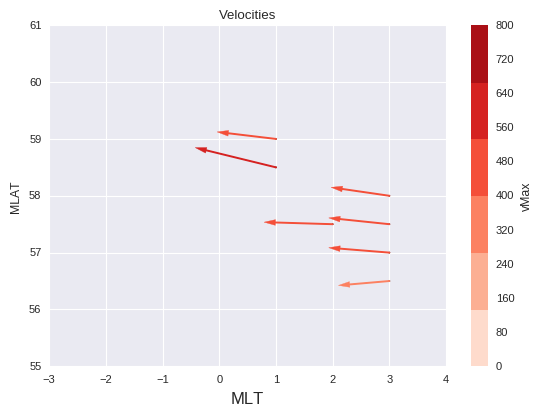

In [93]:
#### Plot the fitted SAPS velocities ####
#### Plot the fitted SAPS velocities ####
#### Plot the fitted SAPS velocities ####
# Seaborn styling
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Reds"))
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
plotMLTs = velAnlysDF['grid_MLT'].unique().tolist()
plotMLATs = velAnlysDF['grid_MLAT'].unique().tolist()

velScaleMin = 0.
# round off max velocity to the next hundred
velScaleMax = (velAnlysDF["Vlos"].max() + 100.)*100/100 - (velAnlysDF["Vlos"].max() + 100.)%100

fitResultsDF.plot( kind='scatter',
              x='grid_normMLT',
              y='grid_MLAT',
              c='vMax',
              s=1., cmap=seaMap, vmin=velScaleMin, vmax=velScaleMax, ax=ax)
ax.set_ylabel("MLAT")
ax.set_xlabel("MLT", fontsize=12)
ax.set_title( "Velocities" )
ax.set_ylim( [int(round(velAnlysDF['grid_MLAT'].min()))-1, \
              int(round(velAnlysDF['grid_MLAT'].max()))+1] )
ax.set_xlim( [int(round(velAnlysDF['grid_MLT'].min()))-1, \
              int(round(velAnlysDF['grid_MLT'].max()))] )

plotMLTends = fitResultsDF['plot_normMLTEnd'].tolist()
plotMLATends = fitResultsDF['plot_MLATEnd'].tolist()
plotMLTbegins = fitResultsDF['grid_MLT'].tolist()
plotMLATbegins = fitResultsDF['grid_MLAT'].tolist()
plotVelMagns = fitResultsDF['vMax'].tolist()
# Normalize velocities according to colorbar
colNorm = Normalize( vmin=velScaleMin, vmax=velScaleMax )
for currMLTend, currMLATend, currMLTbgn, currMLATbgn, currVel in\
        zip( plotMLTends, plotMLATends, plotMLTbegins, plotMLATbegins, plotVelMagns ) :
        # get a appropriate color for each bar
        currCol = seaMap( colNorm(currVel) )
        ax.plot( [currMLTbgn, currMLTend], [ currMLATbgn, currMLATend ], color=currCol )        
        ax.arrow( currMLTbgn, currMLATbgn, currMLTend-currMLTbgn, currMLATend-currMLATbgn,\
                 head_width=0.1, head_length=0.2, fc=currCol, ec=currCol)

ax.get_figure().savefig("../figs/fitVels-grid.pdf",bbox_inches='tight')
#### Plot the fitted SAPS velocities ####
#### Plot the fitted SAPS velocities ####
#### Plot the fitted SAPS velocities ####

In [12]:
# testFittingDF = velAnlysDF[ (velAnlysDF["MLT"] < 3.) &\
#                  (velAnlysDF["MLT"] > 2.) &\
#                 (velAnlysDF["MLAT"] < 58.) &\
#                 (velAnlysDF["MLAT"] > 57.5)].reset_index(drop=True)
testFittingDF = velAnlysDF[ (velAnlysDF["grid_MLT"] == 3.) &\
                 (velAnlysDF["grid_MLAT"] == 57.) ].reset_index(drop=True)
# testFittingDF = testFittingDF[ abs(testFittingDF["azim"]) <= 45. ]
testFittingDF.head(20)

,beam,range,azim,Vlos,MLAT,MLT,grid_MLT,grid_MLAT,radId,radCode,normMLT_x
0,5,27,-41.65,-378.1679,56.7707,2.5742,3.0,57.0,33,bks,2.5742
1,5,28,-41.65,-396.3842,57.0027,2.5315,3.0,57.0,33,bks,2.5315
2,6,25,-37.79,-221.1927,56.8363,2.7286,3.0,57.0,33,bks,2.7286
3,6,26,-37.79,-262.1818,57.1001,2.6891,3.0,57.0,33,bks,2.6891
4,10,23,43.38,304.8513,57.1783,2.5857,3.0,57.0,205,fhe,2.5857
5,11,24,46.62,318.3355,57.0036,2.6815,3.0,57.0,205,fhe,2.6815
6,11,25,46.62,321.9906,57.2431,2.7273,3.0,57.0,205,fhe,2.7273
7,12,26,49.86,370.8088,56.9721,2.8237,3.0,57.0,205,fhe,2.8237
8,12,27,49.86,374.2135,57.1807,2.8718,3.0,57.0,205,fhe,2.8718
9,13,28,53.10,378.7261,56.8113,2.9671,3.0,57.0,205,fhe,2.9671


Vmax---> 437.664836804 +/- 25.947933444
delTheta---> -4.52428364215 +/- 3.57549731737


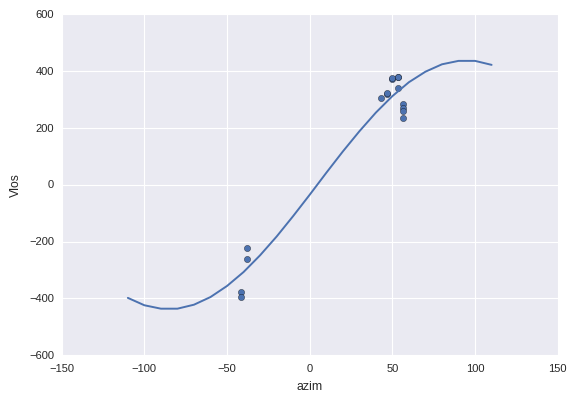

In [13]:
#### Fit the data using scipy.optimize ####
#### Fit the data using scipy.optimize ####
#### Fit the data using scipy.optimize ####
# Fit a sine curve for a given cell
def vel_sine_func(theta, Vmax, delTheta):
    # we are working in degrees but numpy deals with radians
    # convert to radians
    return Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )

initGuess = ( 1000., 10. ) # radians
popt, pcov = scipy.optimize.curve_fit(vel_sine_func, \
                        testFittingDF['azim'].T,\
                        testFittingDF['Vlos'].T,
                       p0=initGuess)
print "Vmax--->", popt[0],"+/-", pcov[0,0]**0.5
print "delTheta--->", popt[1],"+/-", pcov[1,1]**0.5

# plot the model against the given data
def model_func(theta, Vmax=popt[0], delTheta=popt[1]):
    Vlos = Vmax * numpy.sin( numpy.deg2rad(theta) +\
                            numpy.deg2rad(delTheta) )
#     print "Vlos, theta", Vlos, theta
    return Vlos
thetaArr = range(-110, 120, 10)
vLosArr = [ round( model_func(t) ) for t in thetaArr ]
# Plot using matplotlib
fig1 = plt.figure()
ax = fig1.add_subplot(111)
testFittingDF.plot( x="azim", y="Vlos", kind="scatter", ax=ax )
ax.plot( thetaArr, vLosArr )
#### Fit the data using scipy.optimize ####
#### Fit the data using scipy.optimize ####
#### Fit the data using scipy.optimize ####